## Importa as Bibliotecas e a Base de Dados

In [20]:
# Importa as bibliotecas necessárias
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as ptl

# Importa a Base de Dados
data = pd.read_csv('CTG.csv')

# Eliminando colunas que não serão utilizadas
data = data.drop(data.columns[0], axis=1)

data.head()

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,120,0,0,0,73,0.5,43,2.4,0,0,...,62,126,2,0,120,137,121,73,1,2
1,132,4,0,4,17,2.1,0,10.4,2,0,...,68,198,6,1,141,136,140,12,0,1
2,133,2,0,5,16,2.1,0,13.4,2,0,...,68,198,5,1,141,135,138,13,0,1
3,134,2,0,6,16,2.4,0,23.0,2,0,...,53,170,11,0,137,134,137,13,1,1
4,132,4,0,5,16,2.4,0,19.9,0,0,...,53,170,9,0,137,136,138,11,1,1


## Cria o Dataframe

In [21]:
df_data = pd.DataFrame(data)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   int64  
 1   AC        2126 non-null   int64  
 2   FM        2126 non-null   int64  
 3   UC        2126 non-null   int64  
 4   ASTV      2126 non-null   int64  
 5   MSTV      2126 non-null   float64
 6   ALTV      2126 non-null   int64  
 7   MLTV      2126 non-null   float64
 8   DL        2126 non-null   int64  
 9   DS        2126 non-null   int64  
 10  DP        2126 non-null   int64  
 11  Width     2126 non-null   int64  
 12  Min       2126 non-null   int64  
 13  Max       2126 non-null   int64  
 14  Nmax      2126 non-null   int64  
 15  Nzeros    2126 non-null   int64  
 16  Mode      2126 non-null   int64  
 17  Mean      2126 non-null   int64  
 18  Median    2126 non-null   int64  
 19  Variance  2126 non-null   int64  
 20  Tendency  2126 non-null   int6

## Cria o Datraset de Treino

In [22]:
from sklearn.model_selection import train_test_split

# Separa os dados em treino, teste e validação
x_train, x_temp, y_train, y_temp = train_test_split(df_data, data["NSP"], test_size=0.5, stratify=data["NSP"])
x_validation, x_test, y_validation, y_test = train_test_split(x_temp, y_temp, test_size=0.5)

## Encontra a Melhor Configuração

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
higher_acc = -1
cout = 0
models_acc = []

# Melhor critério
for i in ("gini", "entropy"):
    # Melhor divisão
    for j in ("best", "random"):
        # Melhor profundidade
        for k in range(5, 21):
            # Melhor número de folhas
            for l in range(2, 20):
                DT = DecisionTreeClassifier(criterion=i, splitter=j, max_depth=k, min_samples_leaf=l)
                DT.fit(x_train, y_train)
                pred = DT.predict(x_validation)
                
                # Encontra o melhor modelo
                if accuracy_score(y_validation, pred) > higher_acc:
                    higher_acc = accuracy_score(y_validation, pred)
                    best_criterion = i
                    best_splitter = j
                    best_depth = k
                    best_leaf = l
                    model_name = cout
            
                # Mostra os modelos que estão sendo testados
                #print("Modelo:", cout, " Critério:", i, " Divisão:", j, " Profundidade:", k, " Número de Folhas:", l, " Acurácia:", accuracy_score(y_validation, pred))
                
                # Armazena a acurácia de cada modelo
                models_acc.append(accuracy_score(y_validation, pred))
                cout += 1
                

# Mostra a melhor configuração
print("Modelo", model_name, " Melhor Critério:", best_criterion, " Melhor Divisão:", best_splitter, " Melhor Profundidade:", best_depth, " Melhor Número de Folhas:", best_leaf)

Modelo 0  Melhor Critério: gini  Melhor Divisão: best  Melhor Profundidade: 5  Melhor Número de Folhas: 2


Text(0, 0.5, 'Accuracy')

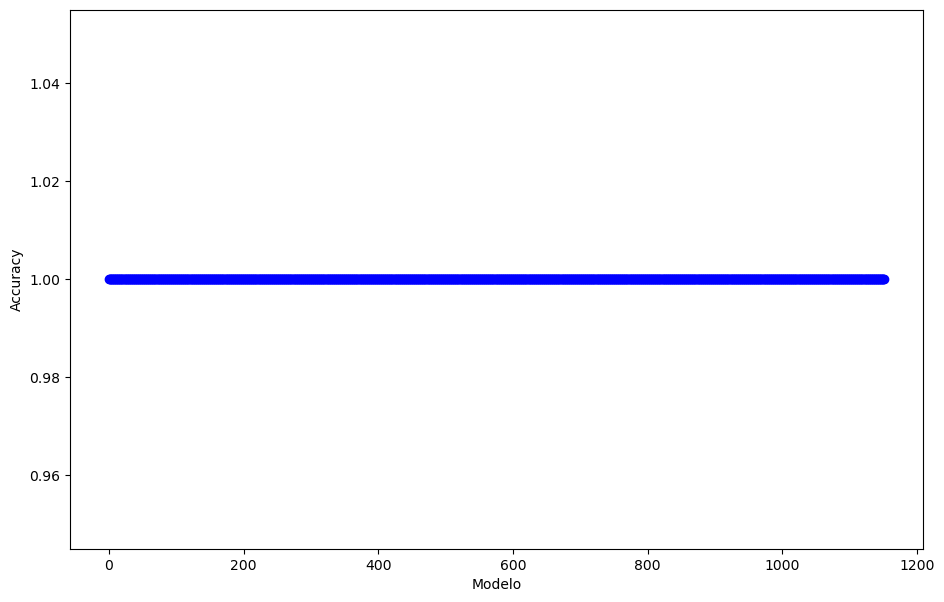

In [24]:
ptl.figure (figsize=(11,7))
ptl.plot(range(cout), models_acc, color='blue', linestyle='dashed', marker='o')
ptl.xlabel('Modelo')
ptl.ylabel('Accuracy')

## Executa o Melhor Modelo

In [25]:
from sklearn.metrics import confusion_matrix

# Cria a árvore de decisão
B_DT = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=5, min_samples_leaf=2)
B_DT.fit(x_train, y_train)
pred = B_DT.predict(x_validation)
print("Acurácia:", accuracy_score(y_validation, pred))
print(confusion_matrix(y_validation, pred))

Acurácia: 1.0
[[412   0   0]
 [  0  79   0]
 [  0   0  40]]
